# Notebooks and Plotting (in science), oh my!
#### Exploring results of Sentiment Analysis for a causal effect from Reference Count on Biological Networks via Jupyter Notebooks, Matplotlib, Seaborn, and pdvega.
#### Mark A. Rice, Jr. B.Sc.
##### Rochester Regional Health, Rochester General Hospital, Center for Clinical Systems Biology

The following notebook serves as an introduction to how I am using Jupyter Notebook in a Systems Biology lab to convey messages to an intelligent non-technical crowd of users. This is a sampling of one experiment to help determine the inflection point on number of data points needed to feel confident in results from a Sentiment Analysis job ran (more on that in another talk).

### Quick backstory:
* I needed a way to quickly convey information to a group of researchers (PhD's in everything but Computer Science, and MD's).
* I refuse to use excel. It has uses... just not for me. 
* I was dealing with a decent amount of data, over many experiments, and I wanted something that I could just change a file name, and poof! Figures for papers/project proposals/personal happiness.

Having converted from Matlab to Python in the last few years, I was excited to have the world's best use case for playing with Jupyter Notebooks. It did not disappoint me at all. I found the experience relatively painless, as matplotlib is basically no different than using plot in matlab. Throw in some pandas, and I will never look back. 

The below code and commentary are a sample workflow, start to finish, enjoy!

Future iterations of this talk will include bokeh(it really is butter) and ggplot (for all my R friends).

In [44]:
#Import all the things.

import pandas as pd
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdvega
sns.set_style("whitegrid")
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

## Read in our data, in the form of csv, from our Sentiment Analysis
The sentiment analysis experiment took edges from a directed graph that had attached support sentences, as well as a polarity from a third party tool (insert plug to Pathway Studio from Elsevier...they made me) and re-ran sentiment analysis on that support corpus to validate the call made in the data given to us. Scientists tend to write convoluted and wonky, so we just wanted to feel better about our confidence, or lack thereof, on that call. 

In [6]:
network = pd.read_csv('/Users/markrice/OneDrive/RGH/NLP_PS/Full_CFS_Sentiment_Analysis.csv')

In [29]:
network.head(1)

,Unnamed: 0,Source,Target,RefCount,PS_Polarity,Data,Unnamed: 6,Unnamed: 7,Sentiment Score,Polarity,PolarityChanged,Weighted Sentiment Score,Weighted Polarity,WeightedPolarityChanged_PS,Validated,Validated_Bool
0,3,ACTH,TNFSF13B,3,NEGATIVE,The normality of much of the ID{12105125=cytok...,NaN,NaN,0,Unknown,True,0.0,Unknown,True,NEGATIVE (PMID 23324534),NEGATIVE


## From our imported data, we grabbed the columns we wanted, and filtered by edges that had a difference in sentiment calls. 

In [32]:
FigureData=network[network['PolarityChanged']==True][['Source','Target','RefCount','PS_Polarity','Polarity','Validated_Bool']]

## A quick pandas.plot boxplot on the reference count

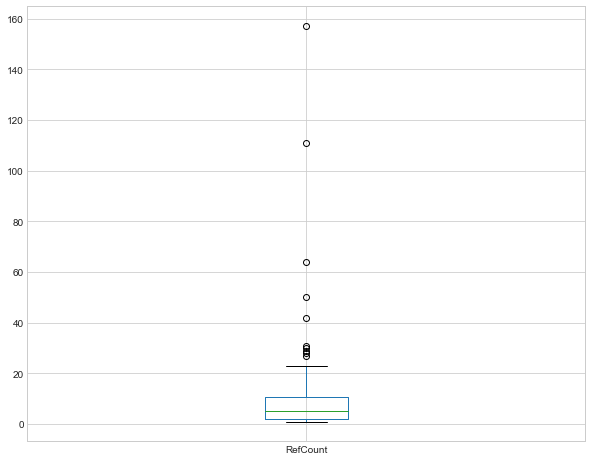

In [45]:
FigureData['RefCount'].plot(kind='box')

To be honest, I probably could have stopped here. This gave us a good snapshot that the majority of the edges that changed had a reference count ~10, and that there were outliers that needed further investigation (150 sentence corpus should turn up similar sentiments). 

 But where is the fun in that? We knew that the vendor would want our feedback, and that we would be presenting in person, so we thought we would make some more impressive visualizations, that had a bit more bite to them, and could be pushed to slidedecks. 

## Enter the violin plot:

The violin plot isn't exactly much different than a simple box plot, but seaborn gave me a bit more flexibility to show some comparitive info between avg. number of references, and polarity. 

### After Sentiment Analysis
The below graph shows reference count density, split by polarity. Original data only had Positive and Negative values, and figure_data is comprised of data who's polarity changed. This figure allows us to get and idea of the average number of references on data that has changed.

Text(0.5,1,'Reference Count of Flagged Relationships')

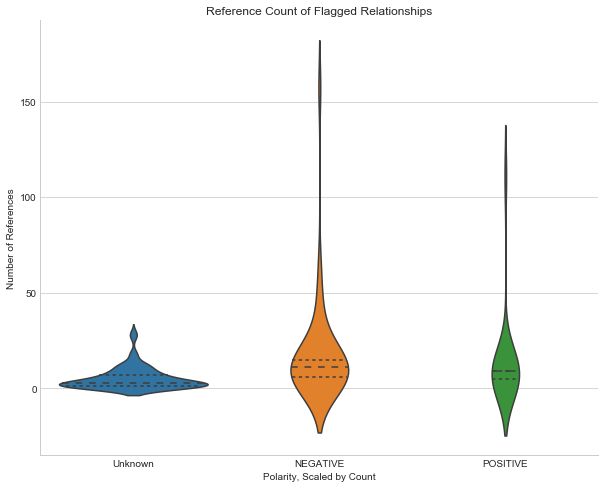

In [52]:
vp = sns.violinplot(y='RefCount', data=FigureData, x="Polarity", scale='count', split=True, inner='quartile')
sns.despine()
vp.set(ylabel='Number of References', xlabel='Polarity, Scaled by Count')
vp.set_title('Reference Count of Flagged Relationships')

# Lets look at this also from the perspective of, polarity and whether or not it changed. fig, ax = plt.subplot

### Original Data

This is a look at the distribution of the original data's reference count. 

Text(0.5,1,'Reference Count of Relationships')

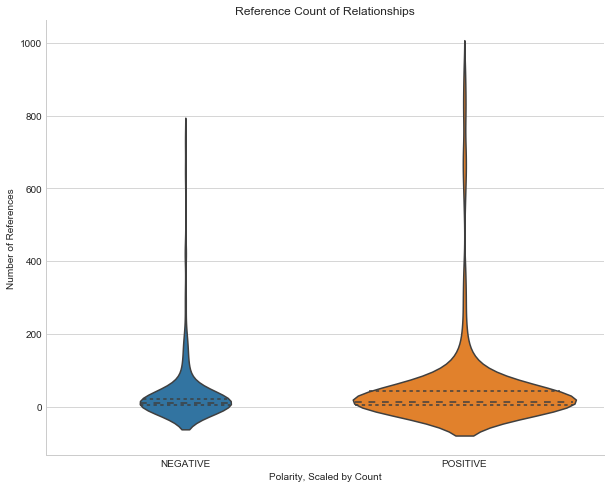

In [53]:
vp2 = sns.violinplot(y='RefCount', data=network, x="PS_Polarity", scale='count', split=True, inner="quartile")
sns.despine()
vp2.set(ylabel='Number of References', xlabel='Polarity, Scaled by Count')
vp2.set_title('Reference Count of Relationships')

### Side by Side view of the data

Text(0.5,0.98,'Reference Count Between Data Sets')

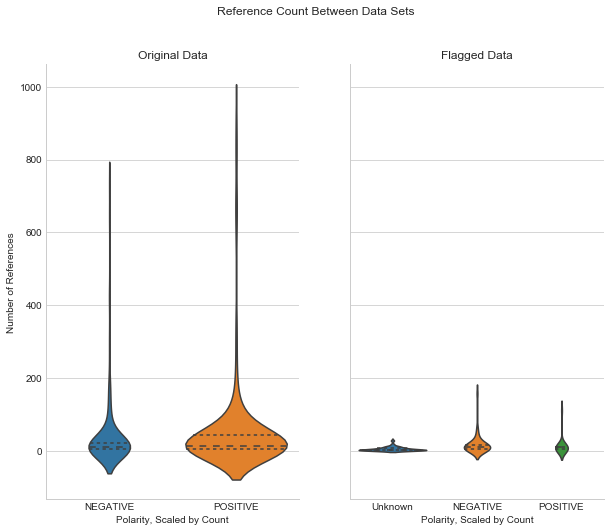

In [56]:
fig, ax = plt.subplots(ncols=2, sharey=True)
vp = sns.violinplot(y='RefCount', data=FigureData, x="Polarity", scale='count', split=True, inner='quartile', ax=ax[1])
sns.despine()
vp.set(ylabel='', xlabel='Polarity, Scaled by Count')
vp.set_title('Flagged Data')
vp2 = sns.violinplot(y='RefCount', data=network, x="PS_Polarity", scale='count', split=True, inner="quartile", ax=ax[0])
sns.despine()
vp2.set(ylabel='Number of References', xlabel='Polarity, Scaled by Count')
vp2.set_title('Original Data')
fig.suptitle('Reference Count Between Data Sets')

In [ ]:
FigureData[FigureData['Validated_Bool'].isnull()]['RefCount'].to_csv('UnvalidatedRefCount.csv')

In [13]:
FigureData.head(5)

,Source,Target,RefCount,PS_Polarity,Validated_Bool
0,ACTH,TNFSF13B,3,NEGATIVE,NEGATIVE
1,ACTH,IL17A,3,NEGATIVE,NaN
2,AVP,dopamine,5,POSITIVE,POSITIVE
3,AVP,OXT,9,POSITIVE,NEGATIVE
4,CRH,triiodothyronine,1,POSITIVE,POSITIVE


In [ ]:
FigureData['RefCount'].to_csv('RefCountCFS.csv')

In [4]:
sum(network['RefCount'])

34078

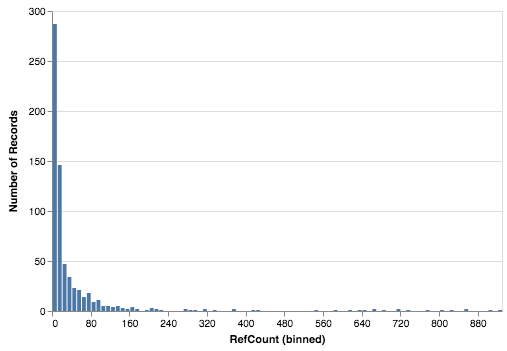

In [28]:
network['RefCount'].vgplot.hist(bins=100)

In [58]:
sorted_index = network.sort_values(by='RefCount',ascending=False).reset_index()

In [59]:
sorted_index[sorted_index['RefCount']<10].head(5)

,index,Unnamed: 0,Source,Target,RefCount,PS_Polarity,Data,Unnamed: 6,Unnamed: 7,Sentiment Score,Polarity,PolarityChanged,Weighted Sentiment Score,Weighted Polarity,WeightedPolarityChanged_PS,Validated,Validated_Bool
389,660,653,stress,CXCL8,9,POSITIVE,"The release of ID{0,3576,12000118,12815095=pro...",NaN,NaN,3,POSITIVE,False,0.038083,Unknown,True,NaN,NaN
390,408,307,KISS1,GH1,9,POSITIVE,"In ID{10000000,7003363,10110307=goldfish pitui...",NaN,NaN,5,POSITIVE,False,0.097601,Unknown,True,NaN,NaN
391,135,590,inhibin,TGFB1,9,NEGATIVE,"In summary, ID{12001867=inhibins} at or less t...",NaN,NaN,1,POSITIVE,True,0.010417,Unknown,True,NEGATIVE,NEGATIVE
392,552,505,epinephrine,TNF,9,NEGATIVE,"In ID{10000000,7000363,10000095=human monocyte...",NaN,NaN,-4,NEGATIVE,False,-0.105775,Unknown,True,NaN,NaN
393,123,538,estrogen,TGFB1,9,NEGATIVE,The ID{7040=transforming growth factor ?} supe...,NaN,NaN,2,POSITIVE,True,0.041949,Unknown,True,NEGATIVE,NEGATIVE


In [ ]:
network

In [ ]:
nodes = set(list(network['Source']) + list(network['Target']))

In [ ]:
len(nodes)

In [ ]:
network['RefCount'].mean()

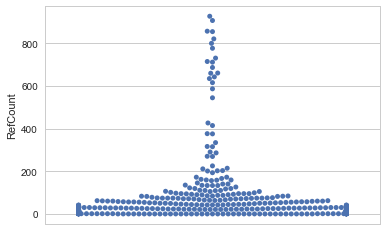

In [17]:
fig = sns.swarmplot(y='RefCount', data=network)

In [18]:
fig.set(ylabel='Number of References')
fig.set_title('Reference Count of Relationships')

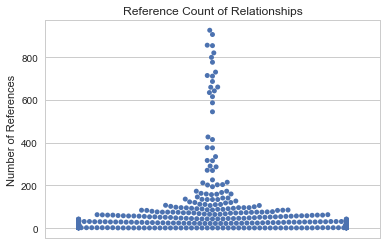

In [19]:
fig.get_figure()

In [20]:
fig.figure.savefig('RefSwarm_CFS2.png', dpi=1000)

In [14]:
list(pd.unique(network[['Source','Target']].values.ravel('K')))

['ACTH',
 'AVP',
 'CRH',
 'CXCL8',
 'FSH',
 'FST',
 'GH1',
 'GNRH1',
 'IFNG',
 'IGF1',
 'IL10',
 'IL13',
 'IL17A',
 'IL1A',
 'IL1B',
 'IL2',
 'IL23',
 'IL4',
 'IL6',
 'INS',
 'KISS1',
 'Luteinizing hormone',
 'NO',
 'OXT',
 'PTGS2',
 'SST',
 'TGFB1',
 'TNF',
 'TNFSF13B',
 'TSH',
 'activin',
 'cortisol',
 'dopamine',
 'epinephrine',
 'estrogen',
 'ethanol',
 'glutamate',
 'inhibin',
 'levothyroxine',
 'norepinephrine',
 'progesterone',
 'stress',
 'triiodothyronine',
 'GNRH2',
 'TRH',
 'natural killer cell',
 'Th17 cell',
 'Th2 cell',
 'Th1 cell',
 'IgG',
 'B cell function',
 'regulatory T-cell',
 'microglia']